# Метод опорных векторов (SVM - support vector machine) на текстах
Импортируем всё, что пригодится:

In [1]:
import pandas
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from matplotlib import pyplot as plt
%matplotlib inline

В pandas есть дефолтный метод, который подгружает тексты новостей - fetch_20newsgroups. Загрузите новости в переменную data. (Чтобы загрузить все новости, нужно передать в функцию параметр subset='all'.)

In [2]:
data = fetch_20newsgroups(subset='all')

Тип нашей переменной - класс Bunch. Посмотрим, что с ним можно делать:

In [3]:
dir(data)

['DESCR', 'data', 'description', 'filenames', 'target', 'target_names']

<ul>
  <li>data - это тексты (т.е. наши признаки, вектор Х)</li>
  <li>target - это номера категорий текстов (т.е. значения целевой переменной у)</li>
  <li>target_names - это список названий категорий
</ul>
Посмотрим, какие категории у нас есть в этом датасете:

In [4]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Чтобы понять, что есть что, посмотрим на data и target:

In [5]:
data.data[0]

"From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>\nSubject: Pens fans reactions\nOrganization: Post Office, Carnegie Mellon, Pittsburgh, PA\nLines: 12\nNNTP-Posting-Host: po4.andrew.cmu.edu\n\n\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n"

In [6]:
data.target[0], data.target_names[data.target[0]]

(10, 'rec.sport.hockey')

Пора создать выборку для бинарной классификации. Для этого в параметре categories нужно передать список из двух любых категорий, которые вам интересны.

In [7]:
data = fetch_20newsgroups(subset='all',categories=['rec.autos', 'rec.sport.hockey'])

Введите переменную X, в которую запишите посчитанные TF-IDF-признаки для всех текстов.

Для преобразования данных в sklearn есть ряд классов-"преобразователей". Алгоритм работы с ними похож на обучение и предсказание классификаторов, только преобразователь нужно прежде "обучить" (fit), а потом преобразовать данные методом transform. Оба эти метода на вход принимают набор данных, которые нужно преобразовать.

Для того, чтобы выполнить преобразование TF-IDF, воспользуйтесь классом TfidVectorizer (http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html).

In [8]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data.data)
X.shape

(1989, 25902)

В переменную y запишите классы ответов из исходной выборки.

In [9]:
y = data.target

Для метода опорных векторов тоже требуется регуляризация. Подберите минимальный лучший параметр регуляризации C из множества [10^−5, 10^−4, ... 10^4, 10^5] для SVM с линейным ядром при помощи кросс-валидации (KFold) по 6 блокам. Укажите параметр random_state=вашему варианту и для SVM, и для KFold. У KFold еще укажите параметр shuffle=True, который перед работой рандомно перемешает выборку. Мера качества - accuracy. Постройте график accuracy от C.

Инициализация SVM-классификатора: SVC(kernel='linear', C=..., random_state=...)

Как работать с KFold и как строить график, можно подглядеть в предыдущей лабе.

Полезные ссылки:<ul>
<li>http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html</li>
<li>http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html</li>
<li>http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html</li>
</ul>

лучший параметр регуляризации C = 10 при current_score= 0.993470862301
0.993470862301


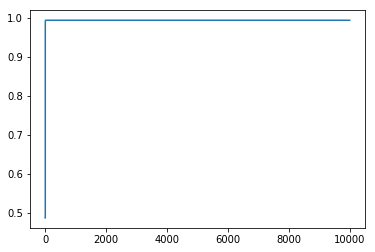

In [10]:
kfold = KFold(n_splits=6, shuffle=True, random_state=3)
c = [10** x for x in range(-5,5,1)]

svc_scores = []
best_c=0
best_score=0
for i in c:
    svc_clf = SVC(kernel='linear', C=i, random_state=3)
    current_score = cross_val_score(svc_clf, X, y, cv=kfold).mean()
    svc_scores.append(current_score)
    #print('При С =', i, 'точность равна', current_score)
    if current_score > best_score:
        best_score = current_score
        best_c = i
print('лучший параметр регуляризации C =', best_c, 'при current_score=', best_score)
print(max(svc_scores))

#график
plt.plot(c, svc_scores)

Обучите классификатор с лучшим параметром C.

In [11]:
svc_clf = SVC(kernel='linear', C=best_c, random_state=3)
svc_clf.fit(X, y)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=3, shrinking=True,
  tol=0.001, verbose=False)

Выделим несколько самых характерных для этой темы слов. Вбейте их в гугл и сравните выбранную тему с темой первой попавшейся статьи.

In [12]:
iis = pandas.DataFrame(svc_clf.coef_.data, svc_clf.coef_.indices).sort_values(by=0, ascending=False)
names = vectorizer.get_feature_names()
[names[i] for i in iis.index[:6]]

['hockey', 'game', 'nhl', 'team', 'ca', 'games']

А теперь найдите любую статью по выбранной теме (на английском языке) и скопируйте ее текст в файл article.txt в папке с данным блокнотом. Что предскажет классификатор относительно тематики этой статьи? Прав ли он оказался?

In [13]:
with open('article.txt') as article:
    # наша статья записана в переменную article. Проведите TF-IDF-преобразование и сделайте предсказание о теме.
    # Название темы можно взять по индексу в data.target_names. Помните, что predict выдает ndarray, поэтому значение
    # нашего единственного предсказание можно получить по индексу 0.
    prediction = svc_clf.predict(vectorizer.transform(article))
    print(data.target_names[data.target[prediction[0]]])

rec.autos
